# Reliability diagrams

In [1]:
import os, sys
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from collections import OrderedDict
from reliability_diagrams import *

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from utils import show_batch, ToDeviceLoader
from models import models
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from tqdm import tqdm
import argparse
from datasets import cub

## Loading confidence and label data 

In [19]:
model_name = 'resnet18'
k = 1
dist_path = '.\\output'

dict_name = '224\\resnet18_cub_size224_onecycle'
path = os.path.join(dist_path, dict_name + '.pt')

In [20]:
dataset = cub
datasets = dataset.get_datasets(224, 0, download=False)
test = DataLoader(datasets['test_known'], batch_size=64,shuffle=False)
test = ToDeviceLoader(test, 'cuda')

model = models.get_model(model_name, k, 3, cub.num_known_classes).to('cuda')
model.load_state_dict(torch.load(path))

confidence = torch.tensor([])
known_labels = torch.tensor([])
pred_labels = torch.tensor([])

for x, y in tqdm(test):
    with torch.no_grad():
        logits = model(x)
        probs = F.softmax(logits, dim=1).cpu()
        confidence = torch.cat((confidence, probs.max(1)[0]))
        known_labels = torch.cat((known_labels, y.cpu()))
        pred_labels = torch.cat((pred_labels, probs.argmax(1).cpu()))

100%|██████████| 30/30 [00:20<00:00,  1.47it/s]


In [33]:
pred_labels = pred_labels.numpy()
known_labels = known_labels.numpy()
confidence = confidence.numpy()

In [34]:
for i in zip(pred_labels, known_labels, confidence):
    print(i)

(2.0, 141.0, 0.23261131)
(148.0, 39.0, 0.113545656)
(155.0, 155.0, 0.24869776)
(72.0, 72.0, 0.8841341)
(13.0, 13.0, 0.662415)
(159.0, 159.0, 0.34068447)
(51.0, 51.0, 0.32793024)
(71.0, 71.0, 0.31901878)
(114.0, 114.0, 0.5836687)
(139.0, 139.0, 0.85009784)
(41.0, 41.0, 0.8019502)
(86.0, 86.0, 0.12794988)
(123.0, 123.0, 0.93066525)
(153.0, 153.0, 0.7397549)
(59.0, 62.0, 0.41559044)
(46.0, 46.0, 0.63816905)
(117.0, 117.0, 0.3425522)
(31.0, 40.0, 0.18215367)
(67.0, 69.0, 0.44936666)
(82.0, 82.0, 0.67269224)
(111.0, 110.0, 0.46454743)
(80.0, 77.0, 0.12062092)
(87.0, 87.0, 0.80696166)
(131.0, 131.0, 0.42458218)
(86.0, 86.0, 0.5881105)
(21.0, 109.0, 0.45283377)
(155.0, 155.0, 0.24417214)
(64.0, 83.0, 0.12981305)
(51.0, 51.0, 0.23196799)
(11.0, 11.0, 0.73854893)
(113.0, 113.0, 0.84180707)
(6.0, 6.0, 0.76344717)
(97.0, 97.0, 0.6829477)
(122.0, 122.0, 0.48886365)
(94.0, 94.0, 0.7046118)
(94.0, 94.0, 0.3769659)
(36.0, 156.0, 0.095061995)
(4.0, 4.0, 0.8013523)
(155.0, 155.0, 0.70602894)
(55.0, 55.

## Make the plot

In [35]:
# Override matplotlib default styling.
plt.style.use("seaborn")

plt.rc("font", size=12)
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

plt.rc("axes", titlesize=16)
plt.rc("figure", titlesize=16)

C:\Users\bauri\AppData\Local\Temp\ipykernel_756\1379399127.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


c:\Users\bauri\OneDrive\Documents\University\RP3\reliability_diagrams.py:177: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(new_ticks)


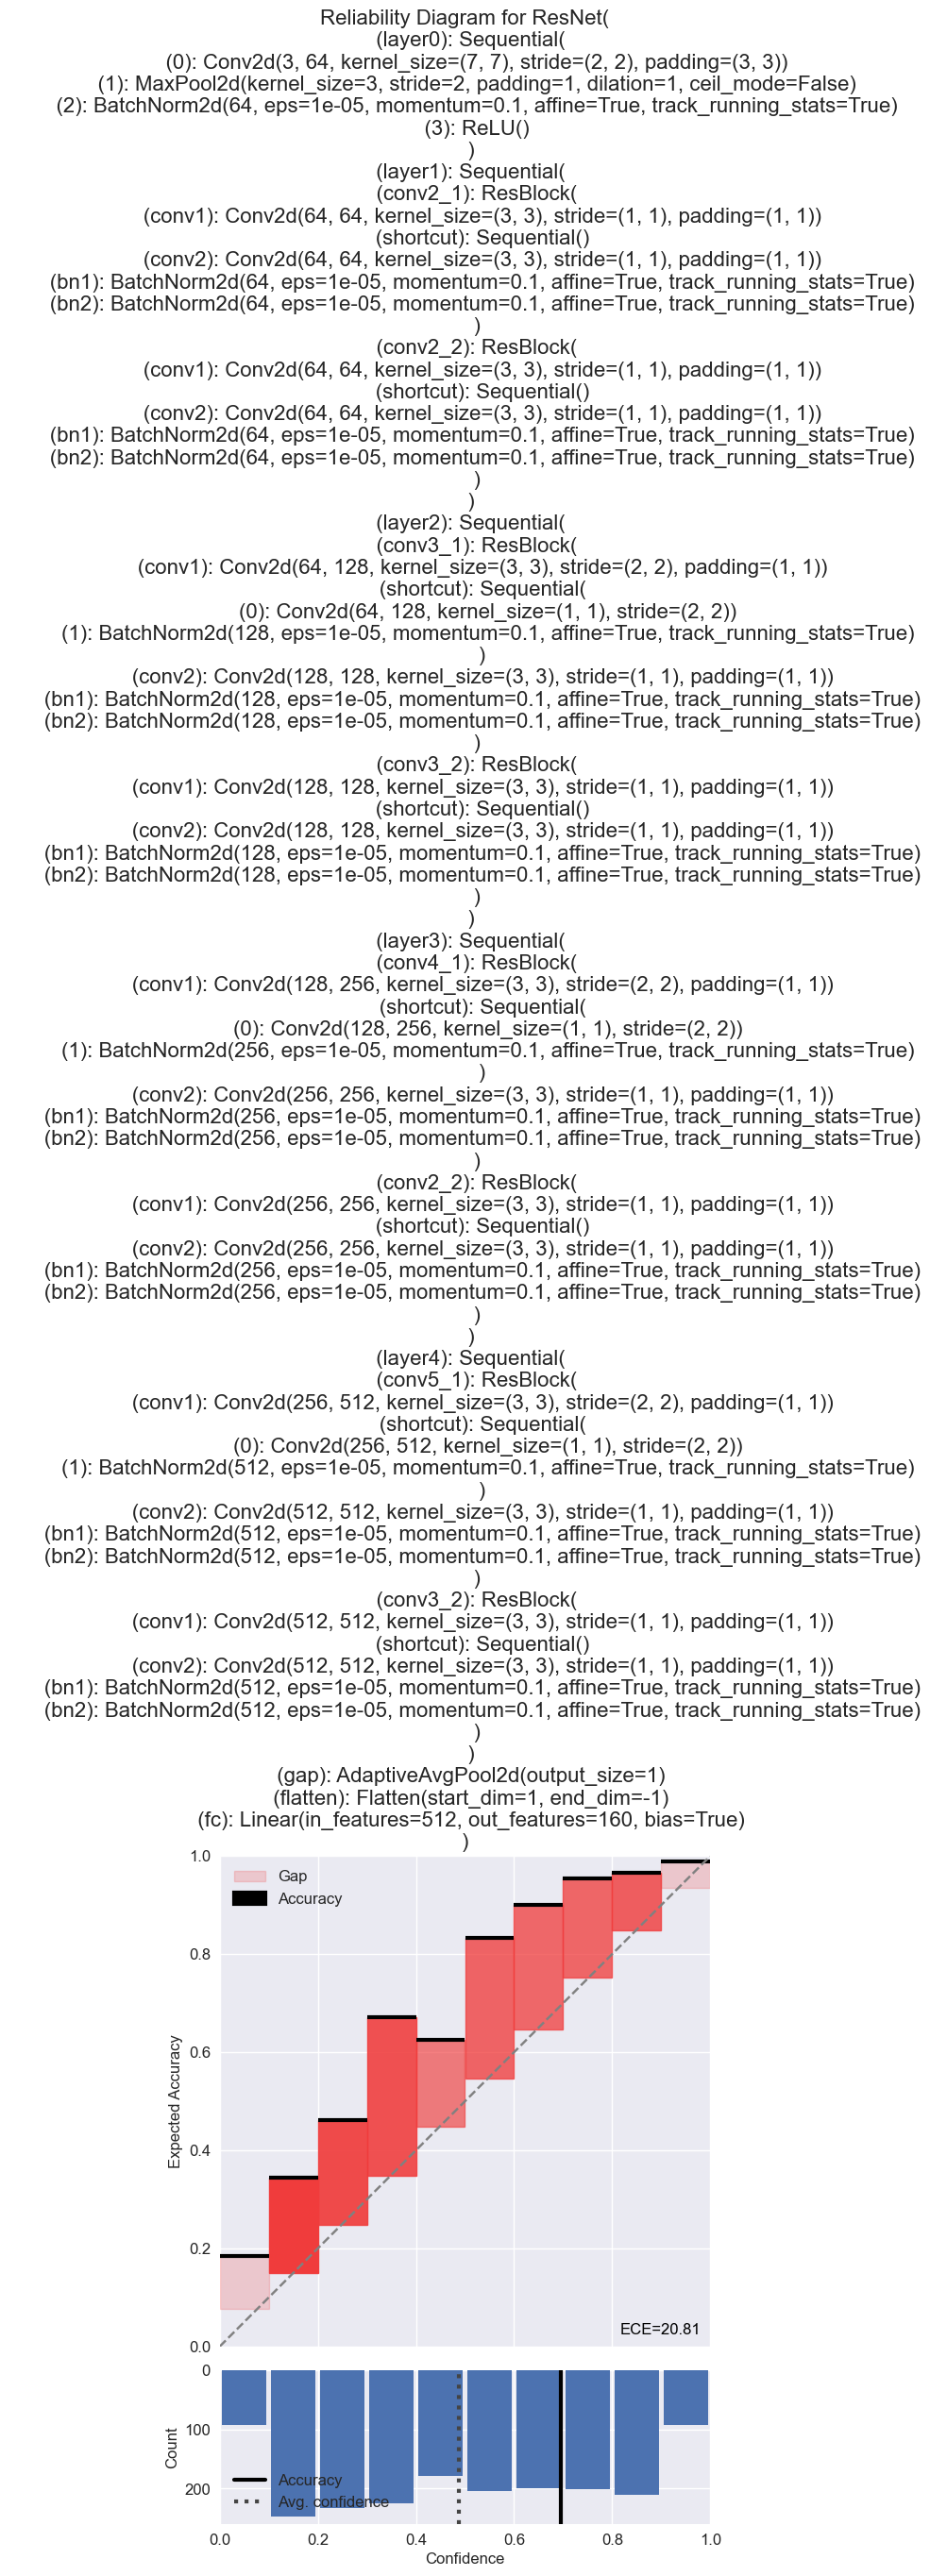

In [36]:
title = f'Reliability Diagram for {model}'

fig = reliability_diagram(known_labels, pred_labels, confidence, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)

In [15]:
fig.savefig("figures/" + "_".join(plot_name.split()) + ".png", 
            format="png", dpi=144, bbox_inches="tight", pad_inches=0.2)